In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

import scipy.stats as st
import statsmodels.api as sm
import pylab as py

# here are some of the tools we will use for our analyses
from sklearn.linear_model import LinearRegression
from sklearn.metrics import PredictionErrorDisplay
#from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import random

random.seed(100)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [1]:
data=r"Final Project 2302 Data - group 13.xlsx"

In [4]:
dataset = pd.read_excel(data,na_values=['--'])
dataset.dropna(inplace=True)

In [5]:
dataset.head()

,NPA,median_age_of_residents_2022,high_speed_internet_access_2022,employment_2022,single_family_housing_2022_Raw,residential_occupancy_2022,home_ownership_2022,vacant_land_in_acres_2022,proximity_to_public_transportation_2022,street_connectivity_index_2022,proximity_to_school_age_care_2022,proximity_to_early_care_and_education_2022
0,2,33.0,0.766,0.955,504,0.940,0.387,21,1129,1.0,1121,651
1,3,31.0,0.916,0.976,1613,0.864,0.389,25,8510,2.0,6605,7502
2,4,44.0,0.919,0.980,364,0.897,1.000,13,353,1.0,162,172
3,5,31.0,0.639,0.847,189,0.940,0.232,36,336,1.0,346,346
4,6,36.0,0.598,1.000,675,0.880,0.315,37,811,1.0,789,811


                                 OLS Regression Results                                 
Dep. Variable:     median_age_of_residents_2022   R-squared:                       0.327
Model:                                      OLS   Adj. R-squared:                  0.312
Method:                           Least Squares   F-statistic:                     21.59
Date:                          Wed, 30 Apr 2025   Prob (F-statistic):           7.94e-33
Time:                                  10:28:52   Log-Likelihood:                -1472.7
No. Observations:                           455   AIC:                             2967.
Df Residuals:                               444   BIC:                             3013.
Df Model:                                    10                                         
Covariance Type:                      nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]

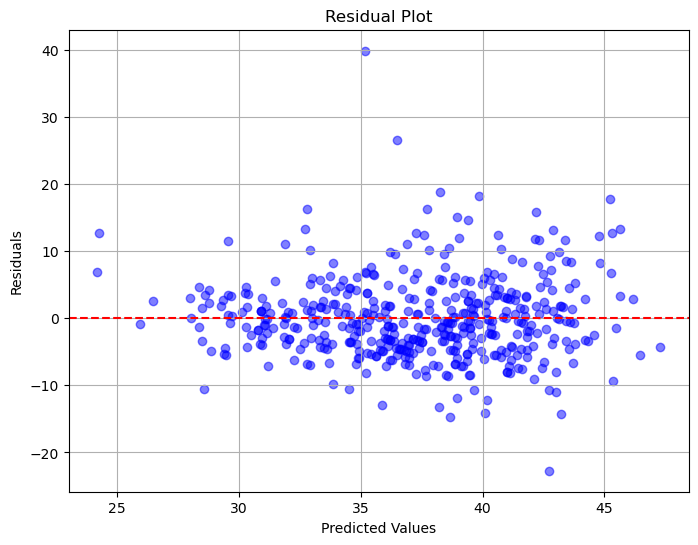

In [9]:
X = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
#removed vacant land, single family housing, street connectivity index, promixity to school age care index, and proximity to early age care and education.
#X = dataset[['home_ownership_2022','high_speed_internet_access_2022']]
#X = dataset[['employment_2022','residential_occupancy_2022','home_ownership_2022','proximity_to_public_transportation_2022']]

y = dataset['median_age_of_residents_2022']

X = sm.add_constant(X)

# Fit the model
model = sm.OLS(round(y), X).fit()

# Print the full model summary
print(model.summary())

# Make predictions using the model
y_pred = model.predict(X)

# Calculate the residuals (difference between true and predicted values)
residuals = y - y_pred

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at zero
plt.title("Residual Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

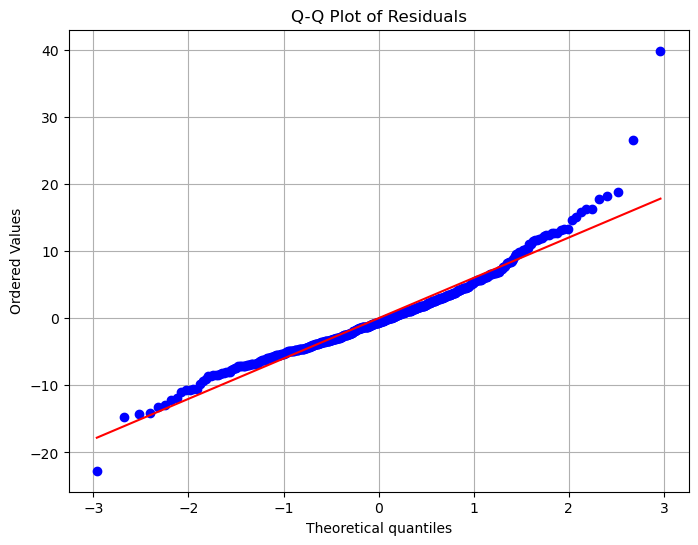

In [10]:
import matplotlib.pyplot as plt
import scipy.stats as stats

# Q-Q plot of the residuals
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.show()





In [7]:
#below is the original X features: 
#X = dataset[['high_speed_internet_access_2022','employment_2022','single_family_housing_2022_Raw','residential_occupancy_2022','home_ownership_2022','vacant_land_in_acres_2022','proximity_to_public_transportation_2022','street_connectivity_index_2022','proximity_to_school_age_care_2022','proximity_to_early_care_and_education_2022']]
X = dataset[['employment_2022','residential_occupancy_2022','home_ownership_2022','proximity_to_public_transportation_2022']]
#removed vacant land, single family housing, street connectivity index. 
y = dataset['median_age_of_residents_2022']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = sm.add_constant(X)


model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
std=np.std(y_pred)

print("Root Mean Squared Error: ", rmse)
print("Mean Squared Error: ", mse)
print("R^2 Score:", r2)
print("Standard Deviation: ", std)
model.summary()

NameError: name 'root_mean_squared_error' is not defined

In [1]:
#round outputs to increase r^2 values and accuracy.
#quantile regression!!!!